In [1]:
import numpy as np
import cv2
import pandas as pd

img = cv2.imread('image/Train_images/Sandstone_Versa0000.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

df = pd.DataFrame()

# Add original pixel values to the data frame as feature 1
img2 = img.reshape(-1)
df['Original_Image'] = img2

# Add other features

# Gabor features
num = 1
kernels = []
for theta in range(2):
    theta = theta/4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi/4):
            for gamma in (0.05, 0.5):
                #print(theta, sigma, lamda, gamma)
                gabor_label = 'Gabor' + str(num)
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                num += 1
                # print(gabor_label)

In [2]:
# Canny edge

edges = cv2.Canny(img, 100, 200)
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1

from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['sobel'] = edge_sobel1

edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['scharr'] = edge_scharr1

edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['prewitt'] = edge_prewitt1

In [3]:
# Gaussian filters
from scipy import ndimage as nd

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['gaussian_s3'] = gaussian_img1

gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['gaussian_s7'] = gaussian_img3

# median filter
median_img = nd.median_filter(img, size=3)
median_img2 = median_img.reshape(-1)
df['median_img'] = median_img2

In [4]:
labeled_img = cv2.imread('image/Train_masks/Sandstone_Versa0000.tif')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img2 = labeled_img.reshape(-1)

df['Labels'] = labeled_img2

In [5]:
# Dependent variable
Y = df['Labels'].values

X = df.drop(['Labels'],axis=1)

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

# import ML algorithm and train the model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [6]:
pred_test = model.predict(X_test)

from sklearn import metrics

print("Acc = ", metrics.accuracy_score(y_test,pred_test))

Acc =  0.9812408998877347


In [7]:
# Save the model
import pickle

filename = 'sandstone_model'
pickle.dump(model, open(filename, 'wb'))

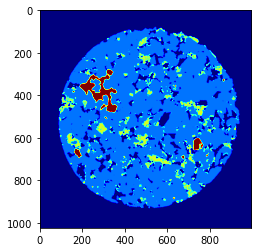

In [8]:
# load the model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt

plt.figure()
plt.imshow(segmented, cmap='jet')

plt.imsave('segmented_rock.jpg', segmented, cmap='jet')

C:\Users\User\anaconda3\myanaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Acc =  0.9476127678558297


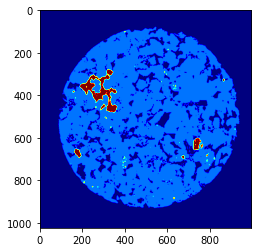

In [10]:
# import ML algorithm and train the model (SVM)

from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

pred_test = model.predict(X_test)

print("Acc = ", metrics.accuracy_score(y_test,pred_test))

filename = 'sandstone_model_svm'
pickle.dump(model, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt

plt.figure()
plt.imshow(segmented, cmap='jet')

plt.imsave('segmented_rock_svm.jpg', segmented, cmap='jet')